# Лабораторная работа #1
### Варламов Никита, М33361; Гайнанов Ильдар, М33371;

# Task 1

Выберите распределение, у которого существуют первые четыре момента, и экспериментально убедитесь в асимптотической нормальности выборочного среднего, выборочной дисперсии, выборочной квантили порядка 0.5 для данного распределения. Также экспериментально убедитесь в том,что: $nF\left(X_{(2)}\right) \rightarrow U_1 \sim \Gamma(2,1)$ и $n\left(1 - F\left( X_{(n)}\right)\right) \rightarrow U_{2} \sim \Gamma(1,1) = \text{Exp}(1)$.
_Указание_ : сгенерируйте достаточно большое количество выборок достаточно большого объема, для каждой сгенерированной выборки вычислите соответсвующие статистики (функции от выборок), постройте гистограммы результатов для каждой статистики, для наглядности рядом с гистограммой можно нарисовать соответствующую плотность (пока это метод "на глаз", но в дальнейшем мы разберем статистическую процедуру, позволяющую проверить согласованность распределения выборки с заданным вероятностным законом), также можно помимо гистограммы вывести мат. ожидание, дисперсию (или стандартное отклонение) и медиану.

Предлагаю выбрать для рассмотрения **экспоненциальное распределение**, оно простое для понимания и имеет все четыре момента (вообще, любые моменты). Генерируем выборку:

In [1]:
import numpy as np

n = 10000
lambd = 1.0
beta = 1 / lambd

data = np.random.exponential(beta, (n, n))
data

array([[1.09506655, 0.74203477, 0.43101782, ..., 1.62465961, 1.66199889,
        0.72234097],
       [0.07382695, 2.79464431, 0.60326686, ..., 0.54057874, 0.34294256,
        1.75241959],
       [0.77828776, 0.52777574, 1.58558082, ..., 1.14803217, 0.09770521,
        0.13056188],
       ...,
       [0.44456942, 0.10297352, 1.91348607, ..., 0.02956429, 0.89679946,
        1.39281716],
       [0.11485685, 0.23242764, 1.42857949, ..., 1.77434629, 1.76363134,
        0.7881924 ],
       [1.14843273, 0.42576721, 1.62563086, ..., 1.11488601, 2.43278428,
        0.91329863]])

Вычисляем для каждой выборки выборочное среднее `means`, выборочную дисперсию `variances` и 0.5 квантиль (оно же медиана) `medians`:

In [2]:
means = np.mean(data, axis=1)
variances = np.var(data, axis=1)
medians = np.quantile(data, 0.5, axis=1)

In [3]:
medians

array([0.69802021, 0.69841424, 0.69527038, ..., 0.68973719, 0.70347202,
       0.68478095])

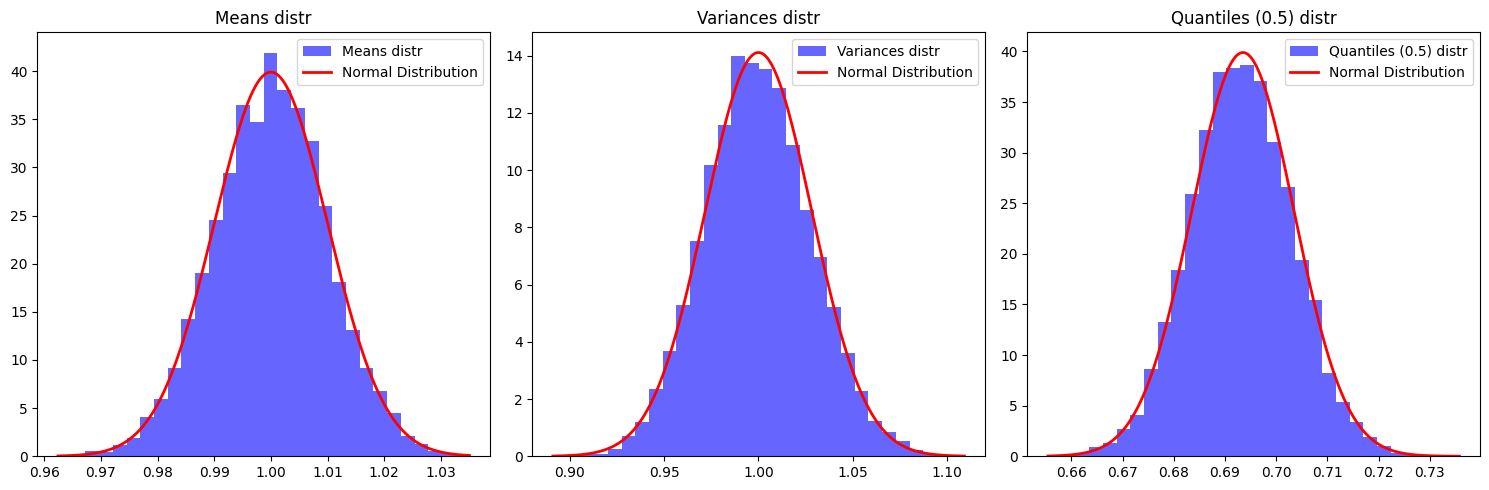

In [4]:
from scipy.stats import norm
import matplotlib.pyplot as plt 

def plot_histogram(data, title, theoretical_mean, theoretical_std):
    plt.hist(data, bins=30, density=True, alpha=0.6, color='b', label=title)
    x = np.linspace(min(data), max(data), 10000)
    plt.plot(x, norm.pdf(x, theoretical_mean, theoretical_std), 'r-', lw=2, label='Normal Distribution')
    plt.title(title)
    plt.legend()
    
plt.figure(figsize=(15, 5))

expected_value = beta

plt.subplot(131)
plot_histogram(means, 'Means distr', expected_value, expected_value/np.sqrt(n))

plt.subplot(132)
plot_histogram(variances, 'Variances distr', 1, expected_value/np.sqrt(n / 8))

plt.subplot(133)
plot_histogram(medians, 'Quantiles (0.5) distr', 0.6935, expected_value/np.sqrt(n))

plt.tight_layout()
plt.show()

Как можно видеть, при большой выборке распределения значений наших функций стремятся к нормальному распределению. Теперь проверим остальные гипотезы:

1. $nF\left(X_{(2)}\right) \rightarrow U_1 \sim \Gamma(2,1)$


In [5]:
from scipy.stats import expon

exp = expon(lambd)

data_X_2 = np.array(list(map(lambda x: sorted(x)[1], data)))

data_X_2

array([0.00020807, 0.00019983, 0.00054629, ..., 0.00018844, 0.00016147,
       0.00018208])

In [6]:
data_X_2_pdf = expon(scale=1/lambd).cdf(data_X_2)

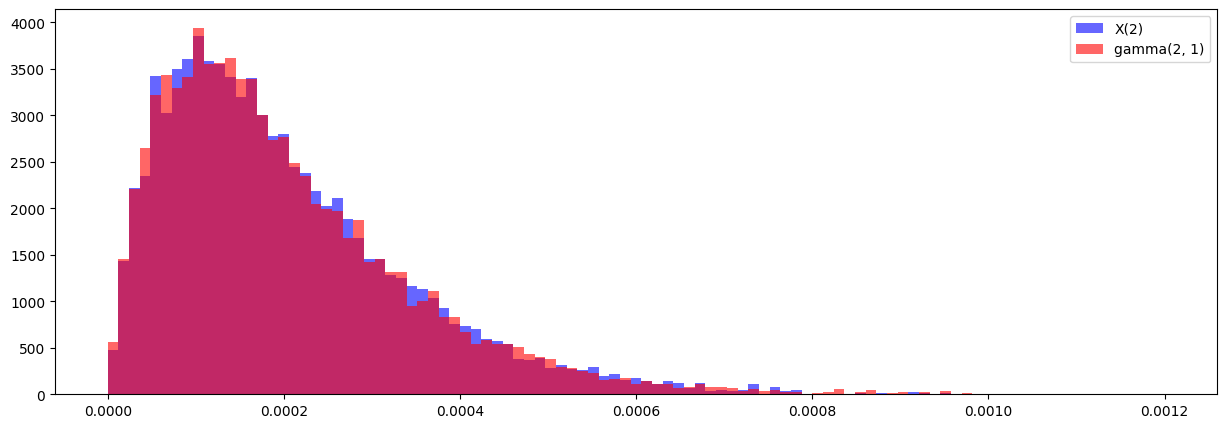

In [7]:
from scipy.stats import gamma

rv = gamma(2, scale = 1)
plt.figure(figsize=(15, 5))
bins = np.linspace(0, 0.0012, 100)
plt.hist(data_X_2_pdf, bins, density=True, alpha=0.6, color='b', label="X(2)")
plt.hist(np.random.gamma(2, 1, (n, 1)) / n, bins, density=True, alpha=0.6, color='red', label="gamma(2, 1)")
plt.legend(loc='upper right')
plt.show()

Отлично, всё работает! Вторая гипотеза:
2. $n\left(1 - F\left( X_{(n)}\right)\right) \rightarrow U_{2} \sim \Gamma(1,1) = \text{Exp}(1)$


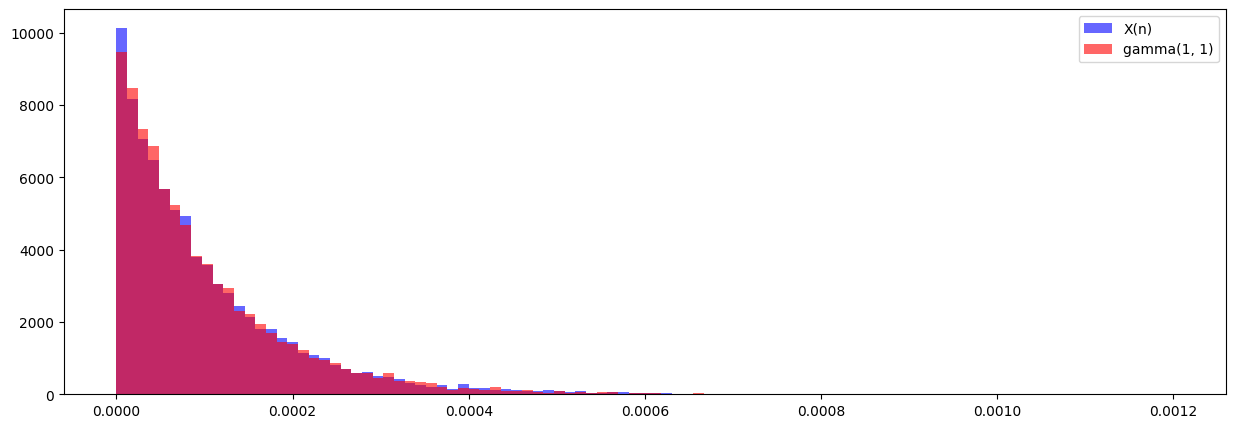

In [8]:
data_X_N = np.array(list(map(lambda x: x.max(), data)))
data_X_N_pdf = (1 - expon(scale=1/lambd).cdf(data_X_N))

plt.figure(figsize=(15, 5))
bins = np.linspace(0, 0.0012, 100)
plt.hist(data_X_N_pdf, bins, density=True, alpha=0.6, color='b', label="X(n)")
plt.hist(np.random.gamma(1, 1, (n, 1)) / n, bins, density=True, alpha=0.6, color='red', label="gamma(1, 1)")
plt.legend(loc='upper right')
plt.show()

# Task 2

В файле `sex_bmi_smokers.csv` приведены данные (пол, ИМТ, курит/не курит) о более 1000 испытуемых. Сравните количество курящих мужчин и некурящих женщин. Рассчитайте выборочное среднее, выборочную дисперсию, выборочную медиану и выборочную квантиль порядка 3/5 ИМТ всех наблюдателей и отдельно для каждой возможной комбинации пол-курение. Построить график эмпирической функции распределения, гистограмму и box-plot ИМТ для всех наблюдателей и отдельно для каждой возможной комбинации пол-курение.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [28]:
df = pd.read_csv("sex_bmi_smokers.csv") 

### Count of male smokers vs. count of female non-smokers

In [29]:
print("Male participants:", len(df[df["sex"] == "male"]))
print("Female participants:", len(df[df["sex"] == "female"]))
print()
print("Male smokers:", len(df[(df["sex"] == "male") & (df["smoker"] == "yes")]))
print("Female non-smokers:", len(df[(df["sex"] == "female") & (df["smoker"] == "no")]))

Male participants: 676
Female participants: 662

Male smokers: 159
Female non-smokers: 547


Количество некурящих женщин в эксперименте более чем в 3 раза превышает количество курящих мужчин.

### Sample [mean, variance, median, 3/5-quantile] of BMT

In [30]:
print("Mean:", df["bmi"].mean())
print("Variance:", df["bmi"].var())
print("Median:", df["bmi"].median())
print("3/5-quantile:", df["bmi"].quantile(3/5))

Mean: 30.66339686098655
Variance: 37.18788360977323
Median: 30.4
3/5-quantile: 32.032


### Sample [mean, variance, median, 3/5-quantile] of BMT (for each combination)

In [31]:
def calc(d, name):
    print(f"{name}:")
    print("\tMean:", d["bmi"].mean())
    print("\tVariance:", d["bmi"].var())
    print("\tMedian:", d["bmi"].median())
    print("\t3/5-quantile:", d["bmi"].quantile(3/5))
    print()

for sex in ["male", "female"]:
    for smoker in ["no", "yes"]:
        calc(df.query(f"sex == \"{sex}\" & smoker == \"{smoker}\""), f"""{sex} {"smoker" if smoker == "yes" else "non-smoker"}s""")

male non-smokers:
	Mean: 30.770580270793037
	Variance: 38.34880053472628
	Median: 30.495
	3/5-quantile: 32.11

male smokers:
	Mean: 31.504182389937107
	Variance: 35.426637618422106
	Median: 31.13
	3/5-quantile: 33.244

female non-smokers:
	Mean: 30.539524680073125
	Variance: 34.83101451724692
	Median: 30.21
	3/5-quantile: 31.912

female smokers:
	Mean: 29.60826086956522
	Variance: 44.40625133485888
	Median: 28.38
	3/5-quantile: 30.875999999999998


### Plots

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff2df458850>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff2de388290>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff2de379f10>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff2de389710>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff2de389fd0>],
 'means': []}

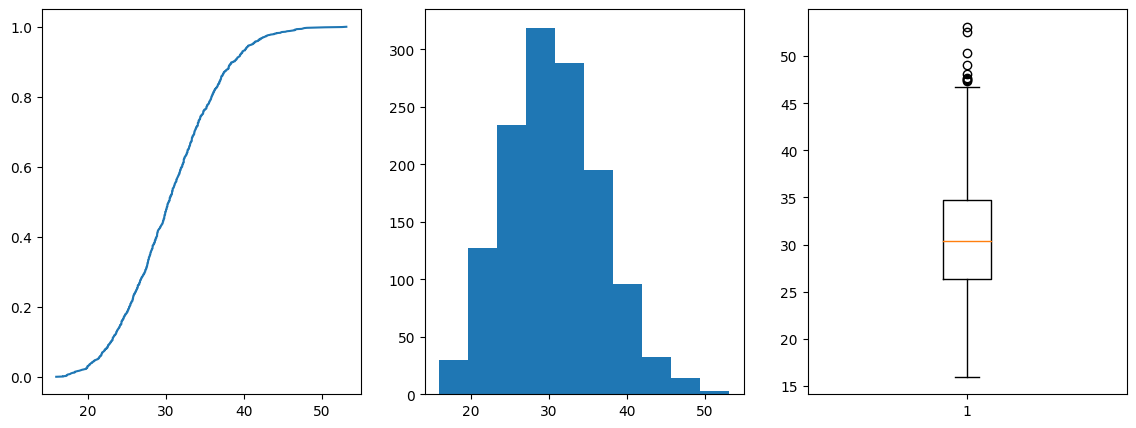

In [47]:
fig, axs = plt.subplots(1, 3, figsize=(14, 5))
fig.tight_layout()
emp_cdf = axs[0]
hist = axs[1]
box = axs[2]
# empirical cdf plot
bmi = df["bmi"].to_numpy()
bmi.sort()
emp_cdf.plot(bmi, np.arange(len(bmi)) / float(len(bmi)))
# histogram
hist.hist(bmi)
# box-plot
box.boxplot(bmi)



### Plots (for each combination)

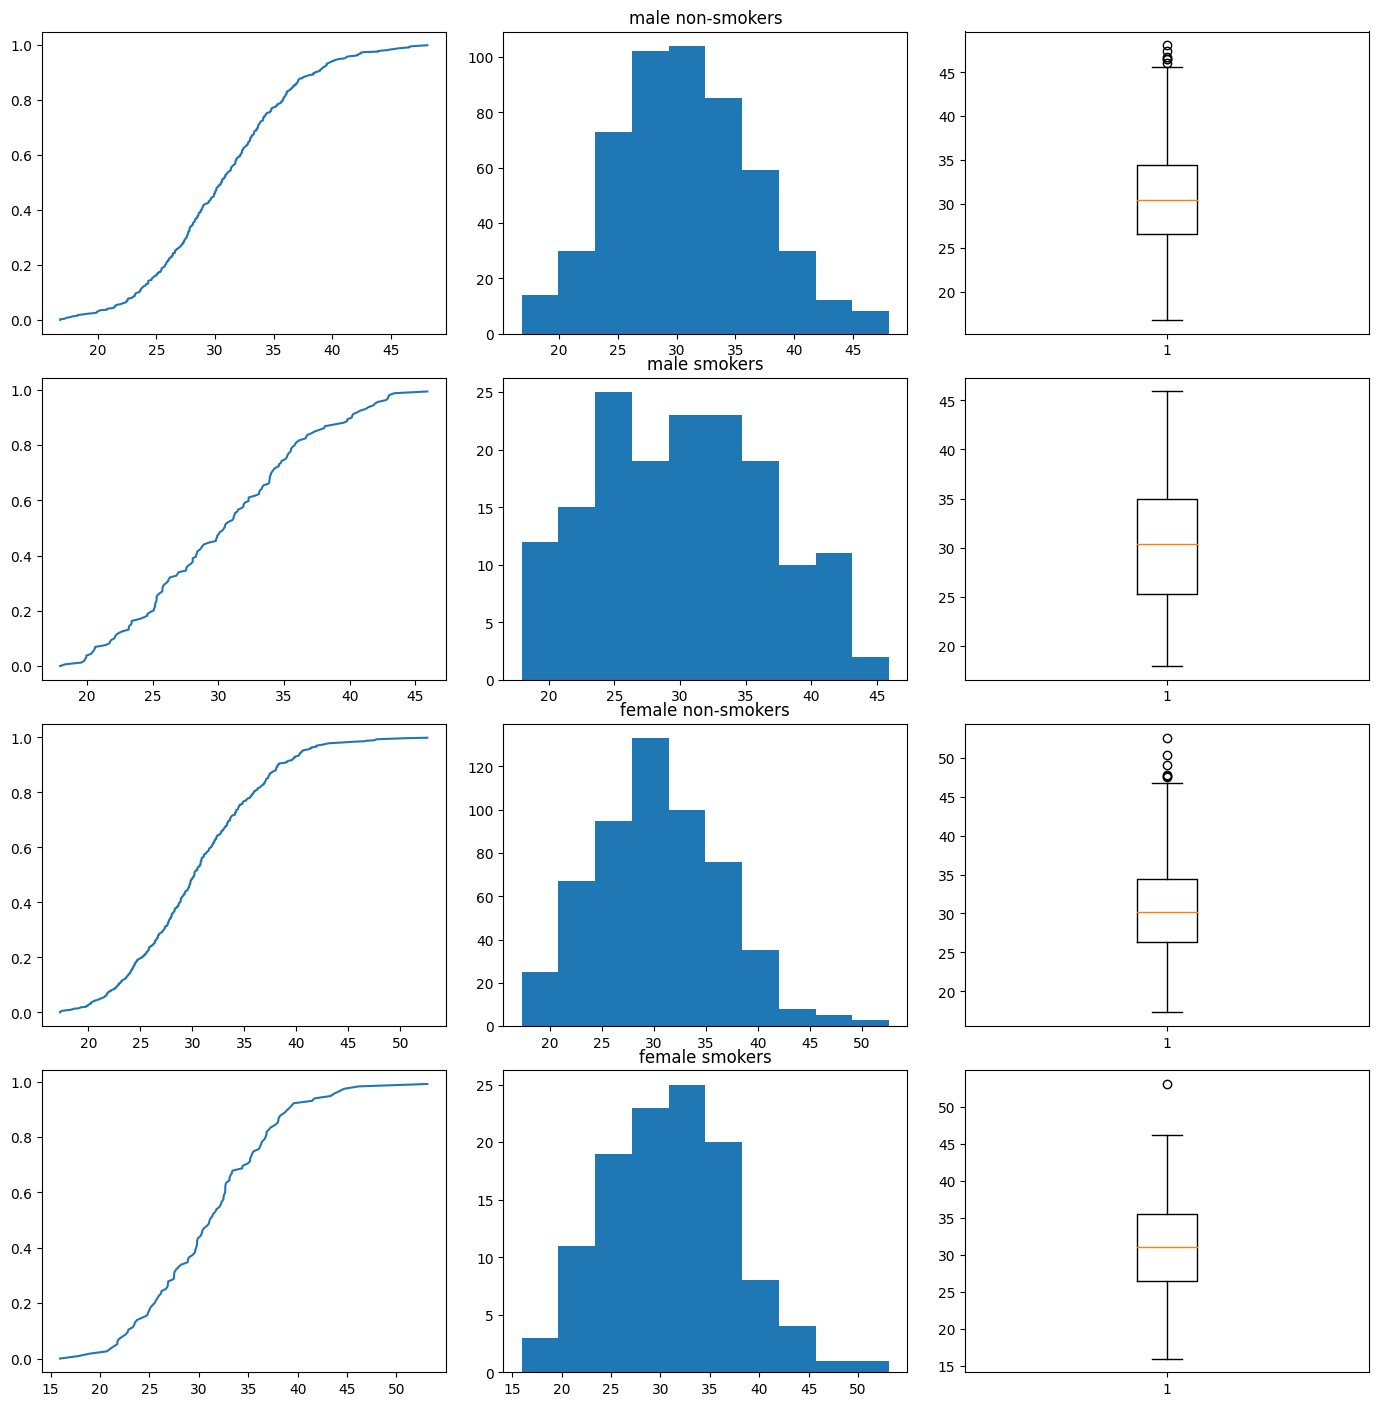

In [53]:
def plot(axs, d, name):
    emp_cdf = axs[0]
    hist = axs[1]
    hist.set_title(name)
    box = axs[2]
    # empirical cdf plot
    bmi = d["bmi"].to_numpy()
    bmi.sort()
    emp_cdf.plot(bmi, np.arange(len(bmi)) / float(len(bmi)))
    # histogram
    hist.hist(bmi)
    # box-plot
    box.boxplot(bmi)

fig, axs = plt.subplots(4, 3, figsize=(14, 14))
fig.tight_layout()
i = 0
for sex in ["male", "female"]:
    for smoker in ["no", "yes"]:
        plot(axs[i], df.query(f"sex == \"{sex}\" & smoker == \"{smoker}\""), f"""{sex} {"smoker" if smoker == "yes" else "non-smoker"}s""")
        i += 1